In [2]:
import pandas as pd
import csv
import json

In [9]:
def set_float_point():
    return pd.set_option('display.float_format', '{:.2f}'.format)

set_float_point()

In [61]:
mapper = pd.read_excel('gdp_mapper.xlsx')
df = pd.read_csv('cleaned_youtuber_ranking.csv')

In [6]:
# gdp by capital data cleaning
with open ('gdp.txt') as gdp:
    new_file_loader = []
    for line in gdp.readlines():
        line_split = line.split('	')
        line_split[-1] = line_split[-1].replace('\n','').replace(',','')
        
        if line_split[1].startswith(' '):
            line_split[1] = line_split[1][1:]
        
        if line_split[-1].isnumeric():
            line_split[-1] = int(line_split[-1])
        new_file_loader.append(line_split)
        

In [7]:
map_data = pd.DataFrame(new_file_loader[1:],columns=new_file_loader[0])

In [8]:
#preprocess youtuber ranking data
map1= set(pd.read_csv('cleaned_youtuber_ranking.csv')['Country'])
len(map1)
map2 = set(map_data['Country'])
##compare country value
map1-map2

{'Andorra', 'Switzerland'}

In [63]:
df.merge(mapper,on='Country').to_excel('manual_process.xlsx')

In [58]:
map_data.to_excel('gdp_mapper.xlsx')

### csv data preprocessing

In [3]:
df = pd.read_csv('cleaned_youtuber_ranking.csv')

In [ ]:
csv_file = 'ass1_dataset.csv'
# json_file = 'ass1_dataset.json'

df = pd.read_csv(csv_file,encoding='ISO-8859-1')
gdp_by_country_name = 'gdp_2023.xls'
gdp_by_country = pd.read_excel(gdp_by_country_name)
gdp_by_country

In [115]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Column Filtering: Processing Columns 1. Earning 2. Sub 3. Viewer 4. categ
<li>subscribers :p1 p2
<li>video views :p1 p2
<li>subscribers_for_last_30_days :p1 p2(prbably not)
<li>video_views_for_the_last_30_days:p1 p2(prbably not)
<li>category: p2
<li>Country:p1 p2
<li>lowest_monthly_earnings: p2
<li>highest_monthly_earnings: p2




In [116]:
selected_col = ['rank','subscribers',
'video views',
'subscribers_for_last_30_days',
'video_views_for_the_last_30_days',
'category',
'Country',
'lowest_monthly_earnings',
'highest_monthly_earnings']


## too many na value in subscribers_for_last_30_days column -> recommend using subscriber & video views

In [117]:
for col in selected_col:
    print(col)
    print(len(df[df[col].isna()]))

rank
0
subscribers
0
video views
0
subscribers_for_last_30_days
337
video_views_for_the_last_30_days
56
category
46
Country
122
lowest_monthly_earnings
0
highest_monthly_earnings
0


### Why subscribers_for_last_30_days is full of notna value --> created_year is incorrect for those channels whose subscribers_for_last_30_days is na

In [118]:
df[df['subscribers_for_last_30_days'].isna()].groupby(by='created_year').count()
df[(df['subscribers_for_last_30_days'].notna())&(df['created_year']==2021)]
df[(df['subscribers_for_last_30_days'].isna())&(df['created_year']==2021)]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
77,78,LUCCAS NETO - LUCCAS TOON,39400000,22302547082.00,People & Blogs,LUCCAS NETO- LUCCAS TOON,1,NaN,NaN,Games,...,NaN,2021.00,Mar,25.00,NaN,NaN,NaN,NaN,NaN,NaN
445,446,Busy Fun Ltd,18800000,7762077012.00,NaN,TG MAYANK YT,2,NaN,NaN,NaN,...,NaN,2021.00,Dec,21.00,NaN,NaN,NaN,NaN,NaN,NaN
668,669,Hongyu ASMR ï¿½ï¿½,15100000,4967784343.00,People & Blogs,Hongyu ASMR ï¿½ï¿½ï,1,NaN,NaN,People,...,NaN,2021.00,Mar,16.00,NaN,NaN,NaN,NaN,NaN,NaN
808,809,Jamuna TV,13900000,12129583055.00,News & Politics,jamuna tv24,6,Bangladesh,BD,Entertainment,...,NaN,2021.00,Feb,10.00,20.60,167310838.00,4.19,60987417.00,23.68,90.36
904,905,Jomy Production,13000000,5057163256.00,Entertainment,SRK Edie soon,8,India,IN,NaN,...,NaN,2021.00,Mar,18.00,28.10,1366417754.00,5.36,471031528.00,20.59,78.96


### count na distribution

(array([17., 16., 11., 16., 12.,  7.,  9.,  8.]),
 array([100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <BarContainer object of 8 artists>)

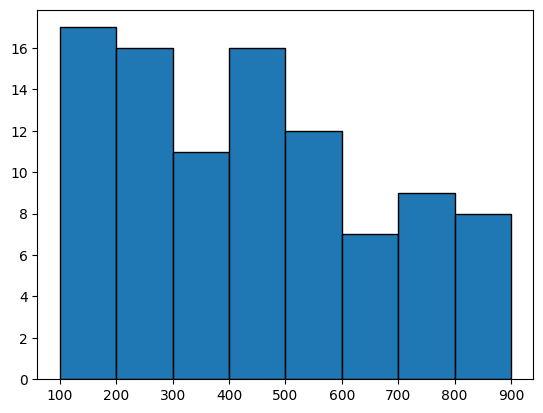

In [119]:
bin_edges = [100,200,300,400,500,600,700,800,900]
x = non_official.loc[df['Country'].isna(),'rank']
plt.hist(x, bins=bin_edges, edgecolor='black')

## cleaning

In [120]:
#out official channel whose video view is 0
def cutoff_video_channel(df):
    return df.loc[df['video views']!=0,:]

non_official = cutoff_video_channel(df)

In [121]:
def cleaning_countryna(df):
    return df.loc[df['Country'].notna(),:]
non_countryna = cleaning_countryna(non_official)

In [122]:
def select_col(df,cols):
    return df[cols]
selected_col = select_col(non_countryna,selected_col)

## GDP datamapping

In [123]:
merged = selected_col.merge(gdp_by_country,on='Country')

In [128]:
merged.to_csv('cleaned_youtuber_ranking.csv')

In [125]:
us_df = df.loc[df['Country']=='United States',:]

In [126]:
nan_df = df.loc[df['Country'].isna(),:]
nan_df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0.00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.00,Sep,24.00,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.00,NaN,Gaming,0,NaN,NaN,Games,...,NaN,2013.00,Dec,15.00,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,24118230580.00,Film & Animation,goldmines,1,NaN,NaN,Music,...,NaN,2006.00,Aug,15.00,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,32312431239.00,Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,...,NaN,2016.00,Nov,29.00,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,19398045702.00,Entertainment,badabun,1,NaN,NaN,Music,...,75.00,2007.00,Jul,21.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4384177908.00,Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,...,NaN,2015.00,Apr,19.00,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5379684248.00,People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,...,NaN,2020.00,Jul,29.00,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1689090619.00,People & Blogs,Hero Movies 2023,689,NaN,NaN,People,...,NaN,2017.00,Feb,22.00,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3392022527.00,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.00,Aug,16.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
df[['video views','category']].groupby('category').sum().sort_values(by='video views',ascending=False)

,video views
category,
Music,3121477506633
Entertainment,2527739309583
People & Blogs,1265791201548
Gaming,717638899629
Education,696614472899
Comedy,550112774315
Film & Animation,544422509313
Shows,446206826909
News & Politics,270391919347


In [ ]:
view_byvid = df.groupby(['Country','category'])[['video views']].sum()

In [ ]:
df.loc[(df['Country']=='India'),:].groupby('category')['video views'].sum()

category
Comedy                  99718638450
Education              179179308515
Entertainment          551343827960
Film & Animation       110125421502
Gaming                   3864199945
Howto & Style           18397094400
Movies                  15383255129
Music                  673625200058
News & Politics        110082745690
People & Blogs         122744120145
Science & Technology    12490209066
Shows                  345677199342
Trailers                33262717607
Name: video views, dtype: float64

In [ ]:
def sort_byview(group):
    return group.sort_values(ascending=False)

### add matrics data into json file

In [68]:
import json

with open('mapjs/countries_10m.json','r',encoding='utf-8') as json_file:
    data = json.load(json_file)

In [84]:
json_country_name = []
for element in data['objects']['countries']['geometries']:
    json_country_name.append(element['properties']['name'])

In [89]:
set(json_country_name)-set(pd.read_excel('manual_process.xlsx')['Country'])

{'Afghanistan',
 'Akrotiri',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barb.',
 'Armenia',
 'Aruba',
 'Ashmore and Cartier Is.',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baikonur',
 'Bajo Nuevo Bank',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Br. Indian Ocean Ter.',
 'British Virgin Is.',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Cayman Is.',
 'Central African Rep.',
 'Chad',
 'Clipperton I.',
 'Comoros',
 'Congo',
 'Cook Is.',
 'Coral Sea Is.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Cyprus U.N. Buffer Zone',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Dhekelia',
 'Djibouti',
 'Dominica',
 'Dominican Rep.',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faeroe Is.',
 'Falkland Is.',
 'Fiji',
 'Fr. Polynesia',
 'Fr. S. Antarctic Lands',
 'Gabon',
 

## output data and do manual mapping

In [93]:
pd.Series(json_country_name).to_excel('json_country.xlsx')

In [96]:
df = pd.read_excel('manual_process.xlsx')

In [130]:
for element in data['objects']['countries']['geometries']:
    print(element['properties']['name'])
    # print(df[df['Country']==element['properties']['name'],'Matric'])
    country_name = element['properties']['name']
    if country_name in list(df['Country']):
        print(country_name)
        element['properties']['matrics'] = df.loc[df['Country']==element['properties']['name'],'Matric'].values[0]
    else:
        element['properties']['matrics'] = 0

Indonesia
Indonesia
Malaysia
Malaysia
Chile
Chile
Bolivia
Peru
Peru
Argentina
Argentina
Dhekelia
Cyprus
India
India
China
China
Israel
Palestine
Lebanon
Ethiopia
S. Sudan
Somalia
Kenya
Pakistan
Pakistan
Malawi
Tanzania
Syria
Somaliland
France
France
Suriname
Guyana
South Korea
South Korea
North Korea
Morocco
Morocco
W. Sahara
Costa Rica
Nicaragua
Congo
Dem. Rep. Congo
Bhutan
Ukraine
Ukraine
Belarus
Namibia
South Africa
St-Martin
Sint Maarten
Oman
Uzbekistan
Kazakhstan
Tajikistan
Lithuania
Brazil
Brazil
Uruguay
Mongolia
Russia
Russia
Czechia
Germany
Germany
Estonia
Latvia
Latvia
Norway
Sweden
Sweden
Finland
Finland
Vietnam
Vietnam
Cambodia
Luxembourg
United Arab Emirates
United Arab Emirates
Belgium
Georgia
Macedonia
Albania
Azerbaijan
Kosovo
Turkey
Turkey
Spain
Spain
Laos
Kyrgyzstan
Armenia
Denmark
Libya
Tunisia
Romania
Hungary
Slovakia
Poland
Ireland
United Kingdom
United Kingdom
Greece
Zambia
Sierra Leone
Guinea
Liberia
Central African Rep.
Sudan
Djibouti
Eritrea
Austria
Iraq
Iraq
It

In [134]:
for element in data['objects']['countries']['geometries']:

    prop_name = element['properties']
    if prop_name['matrics']!=0:
        print(prop_name)

{'name': 'Indonesia', 'matrics': 5.508785374352001}
{'name': 'Malaysia', 'matrics': 2.094411114619514}
{'name': 'Chile', 'matrics': 0.041901156834819896}
{'name': 'Peru', 'matrics': -0.959299497324469}
{'name': 'Argentina', 'matrics': 3.1248072581451525}
{'name': 'India', 'matrics': 33.6329832041919}
{'name': 'China', 'matrics': -0.31212381771281167}
{'name': 'Pakistan', 'matrics': 94.4484302054155}
{'name': 'France', 'matrics': -0.8804855921174939}
{'name': 'South Korea', 'matrics': 2.6031453798182267}
{'name': 'Morocco', 'matrics': 2.2844164919636616}
{'name': 'Ukraine', 'matrics': 8.723531176470589}
{'name': 'Brazil', 'matrics': 2.3696357480373553}
{'name': 'Russia', 'matrics': 3.8929054419560747}
{'name': 'Germany', 'matrics': 0.43342205508888454}
{'name': 'Latvia', 'matrics': 21.927871509614675}
{'name': 'Sweden', 'matrics': -0.27938061938061937}
{'name': 'Finland', 'matrics': -0.8797538490557141}
{'name': 'Vietnam', 'matrics': 14.02234993614304}
{'name': 'United Arab Emirates', '

In [136]:
json.dumps(data)
with open('mapjs/countries_10m_dump.json', 'w', encoding='utf-8') as json_out:
    json.dump(data, json_out)


In [132]:
df[df['Country']=='Indonesia']['Matric'].values[0]

5.508785374352001

In [133]:
df.loc[df['Country']==element['properties']['name'],'Matric']

Series([], Name: Matric, dtype: float64)